<a href="https://colab.research.google.com/github/anushavasup/flowers_recognition-using_kfold/blob/main/flowers_multiclass_kfold_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/flowers.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [4]:
import glob 
import cv2
from skimage.transform import resize
folders=['daisy','dandelion','rose','sunflower','tulip']
X=[]#feature dataset
y=[]#target data set
#loop through everyfolder
for folder in folders:
  path='/content/flowers/'+folder+'/*.jpg'
  files=glob.glob(path)
  for myfile in files:
    image=cv2.imread(myfile)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=resize(image,(32,32,3))
    X.append(image)
    y.append(folder)
    

In [ ]:
len(y)

4317

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import LabelEncoder
y_train=LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)
print(y_train)


[0 4 4 ... 3 4 1]


In [14]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
X_train1=np.array(X_train)
X_test1=np.array(X_test)
print(type(X_test1))
print(np.max(X_test1[3]))

<class 'numpy.ndarray'>
0.9647058823529412


In [24]:
from sklearn.model_selection import KFold
num_folds = 4
verbosity = 1

# Normalize data
#input_train = input_train / 255
#input_test = input_test / 255
# Parse numbers as floats
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((X_train1, X_test1), axis=0)
targets = np.concatenate((y_train_one_hot, y_test_one_hot), axis=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  import keras

# Creating a Sequential model
  model_flower= Sequential()
#model.add(data_augmentation)
  model_flower.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(32,32,3)))
  model_flower.add(Dropout(0.2))

  model_flower.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
  model_flower.add(MaxPool2D(2,2))
  model_flower.add(Dropout(0.2))

  model_flower.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
  model_flower.add(MaxPool2D(2,2))
  model_flower.add(Dropout(0.2))

  model_flower.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
  model_flower.add(Dropout(0.2))

  model_flower.add(Flatten())

  model_flower.add(Dense(1024,activation='tanh'))
  model_flower.add(Dropout(0.2))
  model_flower.add(Dense(512,activation='tanh'))
#model_flower.add(Dense(32,activation='relu'))

  model_flower.add(Dense(5,activation = 'softmax'))

#optimizer = keras.optimizers.Adam(lr=0.1)   
  model_flower.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam',
              
             )
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  # Training the model
  history = model.fit(inputs[train], targets[train],epochs=50,batch_size=50,verbose=verbosity,validation_split=0.3)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')





------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
46/46 [==============================] - 9s 204ms/step - loss: 0.9565 - acc: 0.6049 - val_loss: 0.9954 - val_acc: 0.6008
Epoch 2/50
46/46 [==============================] - 9s 185ms/step - loss: 0.9347 - acc: 0.6128 - val_loss: 0.9684 - val_acc: 0.6235
Epoch 3/50
46/46 [==============================] - 8s 165ms/step - loss: 0.9163 - acc: 0.6384 - val_loss: 0.9921 - val_acc: 0.6173
Epoch 4/50
46/46 [==============================] - 8s 167ms/step - loss: 0.8918 - acc: 0.6384 - val_loss: 0.9807 - val_acc: 0.6348
Epoch 5/50
46/46 [==============================] - 8s 165ms/step - loss: 0.8785 - acc: 0.6446 - val_loss: 0.9801 - val_acc: 0.6008
Epoch 6/50
46/46 [==============================] - 8s 165ms/step - loss: 0.8813 - acc: 0.6402 - val_loss: 0.9428 - val_acc: 0.6399
Epoch 7/50
46/46 [==============================] - 8s 165ms/step - loss: 0.8595 - acc: 0.6521 - val_loss: 0.95

In [34]:
from tensorflow.keras.models import Sequential, save_model, load_model
# Save the model
filepath = './saved_model'
save_model(model, filepath, save_format='h5')


In [35]:
# Load the model
loaded_model = load_model(
    filepath,
    custom_objects=None,
    compile=True
)

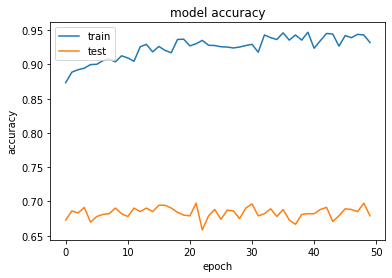

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

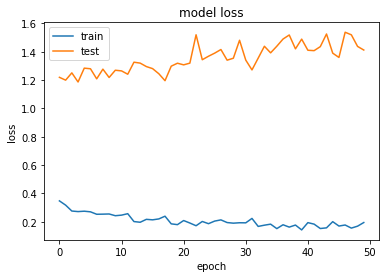

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#Let’s test the model by loading a new image.
from google.colab import files
uploaded=files.upload()

Saving sunflower.jpg to sunflower.jpg


daisy : 0.0 %
dandelion : 0.0 %
rose : 0.0 %
sunflower : 100.0 %
tulip : 0.0 %


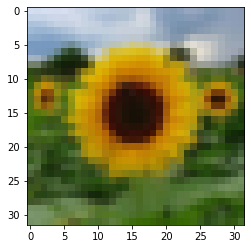

In [39]:
new_image=plt.imread("/content/sunflower.jpg")
plt.imshow(new_image)
from skimage.transform import resize
import numpy as np
new_resize=resize(new_image,(32,32,3))
plt.imshow(new_resize)
probabilities=loaded_model.predict(np.array([new_resize,]))
i=0
for i in range(5):
  print(folders[i],':',round(probabilities[0][i]*100,2),"%")

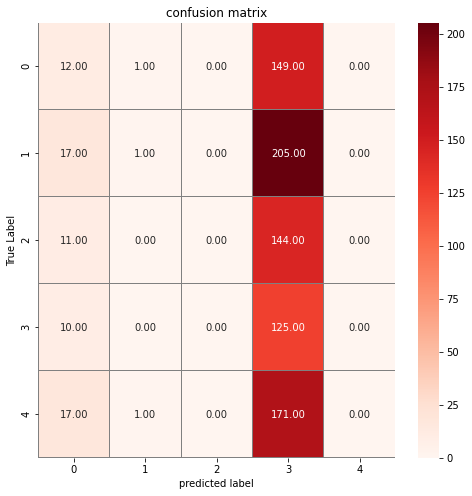

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model_flower.predict(X_test1)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test_one_hot,axis=1)
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()
